keypoints: 500, descriptors: (500, 32)
keypoints: 500, descriptors: (500, 32)


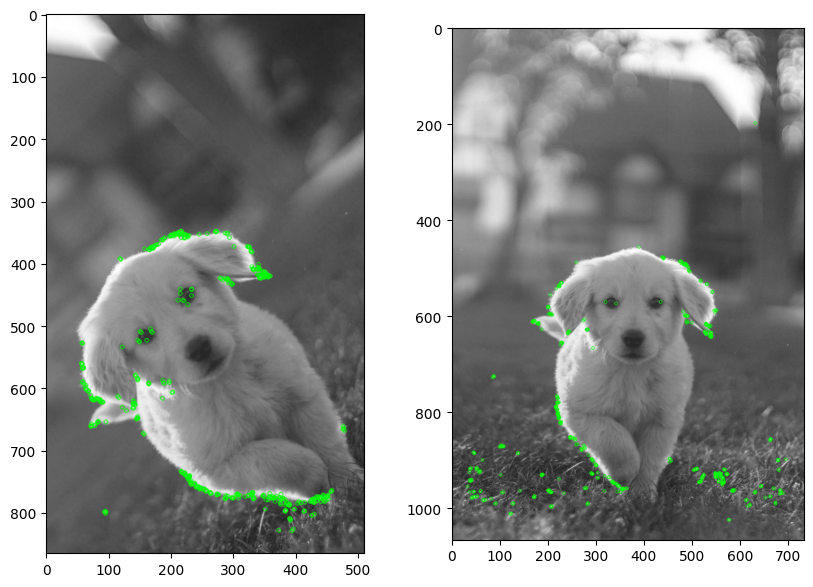

In [81]:
# create simple image alignment using orb feature detector

import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

# read input images

im = cv2.imread("./images/dog1r.png", cv2.IMREAD_COLOR)
imReference = cv2.imread("./images/dog1.png", cv2.IMREAD_COLOR)


img1 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(imReference, cv2.COLOR_BGR2GRAY)

# create orb feature detector
orb = cv2.ORB_create(500)

# find keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

print("keypoints: {}, descriptors: {}".format(len(kp1), des1.shape))
print("keypoints: {}, descriptors: {}".format(len(kp2), des2.shape))

# DRAW_MATCHES_FLAGS_DEFAULT
# DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
# DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG
# DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS
img_keypoints = cv2.drawKeypoints(img1, kp1, None, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
img_keypoints2 = cv2.drawKeypoints(img2, kp2, None, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# display images with keypoints dotted
plt.figure(figsize=(10,7))
plt.subplot(121)
plt.imshow(img_keypoints)
plt.subplot(122)
plt.imshow(img_keypoints2)

In [82]:
# # draw matches
# bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# matches = bf.match(des1, des2)

# # sort matches by distance
# matches = sorted(matches, key = lambda x:x.distance)

# # draw first 10 matches
# img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)

# # resize the image
# scale_percent = 220 # percent of original size
# width = int(img3.shape[1] * scale_percent / 100)
# height = int(img3.shape[0] * scale_percent / 100)
# dim = (width, height)
# img3 = cv2.resize(img3, dim, interpolation = cv2.INTER_AREA)

# plt.figure(figsize=(10,5))
# plt.imshow(img3)
# plt.show()

Found 500 matches.
matches: 50


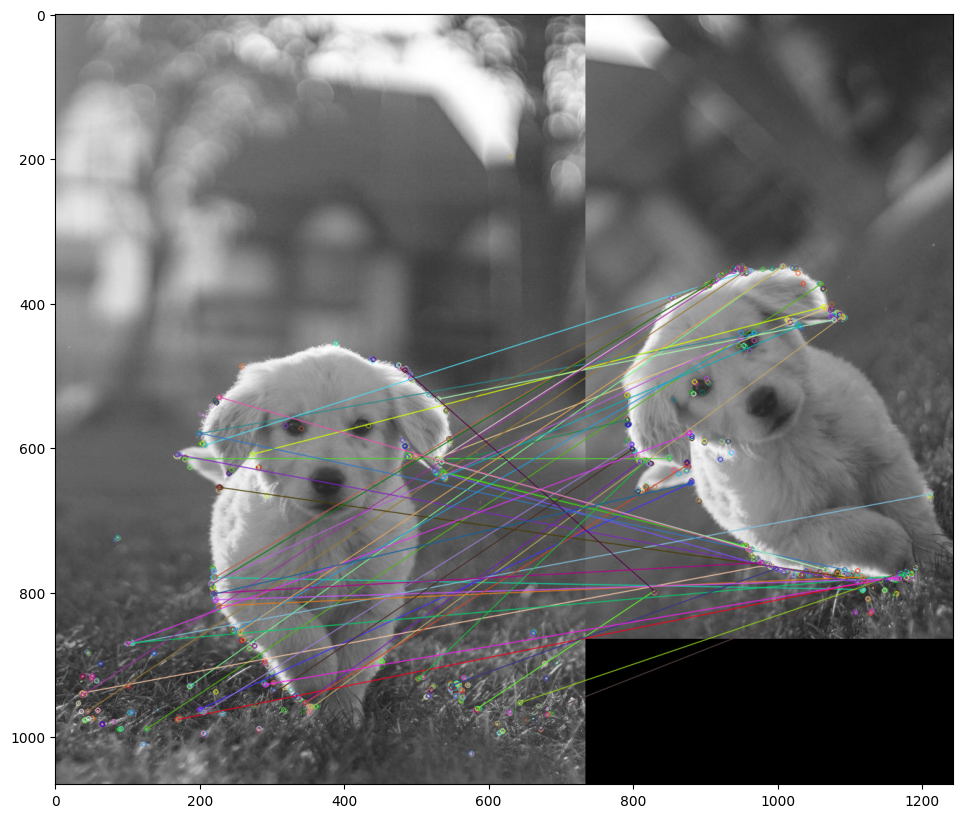

In [83]:
# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(des1, des2, None)

print(f"Found {len(matches)} matches.")

# sort matches by distance
matches = sorted(matches, key=lambda x: x.distance, reverse=False)
numGoodMatches = int(len(matches) * 0.10)
matches = matches[:numGoodMatches]

print("matches: {}".format(len(matches)))

# draw first 50 matches
img3 = cv2.drawMatches(img2, kp2, img1, kp1, matches,None)

plt.figure(figsize=(20,10))
plt.imshow(img3)


Estimated homography : 
 [[ 6.97339343e-01 -7.01799321e-01  5.80174759e+02]
 [ 6.89060191e-01  7.05113040e-01  9.52045298e+01]
 [-2.31573246e-05  6.00620204e-07  1.00000000e+00]]
Image ref shape: (865, 510)


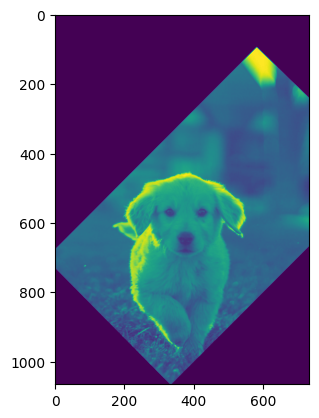

In [84]:
# Extract location of good matches
points_1 = np.zeros((len(matches), 2), dtype=np.float32)
points_2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points_1[i, :] = kp1[match.queryIdx].pt
    points_2[i, :] = kp2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points_1, points_2, cv2.RANSAC)

# Use homography
height, width, channels = imReference.shape
im1_reg = cv2.warpPerspective(img1, h, (width, height))

print("Estimated homography : \n",  h)
print(f"Image ref shape: {img1.shape}")
plt.imshow(im1_reg)
